In [17]:
import re
import nltk
# nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize,sent_tokenize
from nltk.tag import pos_tag
from nltk.util import ngrams

from stemming.porter2 import stem

filename = "/Users/maitrayedas/Documents/Fall 2018/ML/project/movie/MPST/final_plots_wiki_imdb_combined/raw/tt0033616.txt"
with open(filename, "r") as fin:
    synopsis = fin.read()

#tokenize sentence i.e., find sentences from the synopsis
sentence_list = nltk.sent_tokenize(synopsis) 

#remove stopwords and find word frequencies
stopwords = nltk.corpus.stopwords.words('english') 

all_words = []
word_list = []
bigram_list = []
trigram_list = []

for sentence in sentence_list:
    # Removing special characters and digits
    formatted_sentence = re.sub('[^a-zA-Z]', ' ', sentence )  
    formatted_sentence = re.sub(r'\s+', ' ', formatted_sentence)
    
    #find out word tokens
    word_tokens = nltk.word_tokenize(formatted_sentence)
    all_words.extend(word_tokens)
    bigrams = ngrams(word_tokens,2)
    trigrams = ngrams(word_tokens,3)
    
    print(word_tokens)
    print(bigrams)
    print(trigrams)
    

    #find parts of speech
    tagged_sent = nltk.pos_tag(word_tokens) 
    #find proper nouns
    propernouns = [w for w,pos in tagged_sent if pos == 'NNP'] 
    print("proper nouns")
    print (propernouns)
    
    #remove proper nouns from words
    non_propernouns = [w for w in word_tokens if not w in propernouns]
    #remove stopwords
    filtered_word_tokens = [w for w in non_propernouns if not w in stopwords]

    non_propernoun_bigrams = [(x,y) for x,y in bigrams if (x not in propernouns and y not in propernouns)]
    filtered_bigrams = [(x,y) for x,y in non_propernoun_bigrams if (x not in stopwords and y not in stopwords)]
    
    non_propernoun_trigrams = [(x,y,z) for x,y,z in trigrams if (x not in propernouns and y not in propernouns and z not in propernouns)]
    filtered_trigrams = [(x,y,z) for x,y,z in non_propernoun_trigrams if (x not in stopwords and z not in stopwords)]
    
    word_list.extend(filtered_word_tokens)
    
    bigram_list.extend(filtered_bigrams)
    
    trigram_list.extend(filtered_trigrams)
    
    print(filtered_word_tokens)
    print(filtered_bigrams)
    print(filtered_trigrams)
    
print(word_list)
print(bigram_list)
print(trigram_list)

['Francis', 'Warren', 'Errol', 'Flynn', 'appears', 'to', 'have', 'a', 'normal', 'life', 'handling', 'investments', 'but', 'secretly', 'he', 'writes', 'lurid', 'detective', 'novels', 'under', 'the', 'pseudonym', 'F', 'X']
<generator object ngrams at 0x115419888>
<generator object ngrams at 0x11a2cc678>
proper nouns
['Francis', 'Warren', 'Errol', 'Flynn', 'F', 'X']
['appears', 'normal', 'life', 'handling', 'investments', 'secretly', 'writes', 'lurid', 'detective', 'novels', 'pseudonym']
[('normal', 'life'), ('life', 'handling'), ('handling', 'investments'), ('writes', 'lurid'), ('lurid', 'detective'), ('detective', 'novels')]
[('normal', 'life', 'handling'), ('life', 'handling', 'investments'), ('investments', 'but', 'secretly'), ('secretly', 'he', 'writes'), ('writes', 'lurid', 'detective'), ('lurid', 'detective', 'novels')]
['Pettijohn']
<generator object ngrams at 0x11a2cca98>
<generator object ngrams at 0x115419888>
proper nouns
[]
['Pettijohn']
[]
[]
['His', 'other', 'career', 'is',

In [19]:
from collections import Counter
import pandas as pd
from stemming.porter2 import stem

title = "Footsteps in the Dark"

feature_dict_list = []   
for word in word_list:
    stemmed_word = stem(word)
    for d in feature_dict_list:
        if stemmed_word == d['stemmed_phrase']:
            d['tf_phrase'] += 1
            d['whole_phrases'].append(word)
            break
    else:
        feature_dict={}
        feature_dict['stemmed_phrase'] = stemmed_word
        feature_dict['whole_phrases'] = [word]
        feature_dict['tf_phrase'] = 1
        feature_dict['phrase_length'] = 1
        feature_dict['first_occurance_phrase'] = all_words.index(word)
        feature_dict['first_occurance_word'] = feature_dict['first_occurance_phrase']       
        #feature_dict['last_occurance_phrase'] = all_words.rindex(word)
        feature_dict['inTitle'] = word in title
        feature_dict_list.append(feature_dict)
        
for d in feature_dict_list:
    d['common_whole_phrase'] = Counter(d['whole_phrases']).most_common(1)[0][0]
    d['max_freq_word'] = d['tf_phrase']
    d['min_freq_word'] = d['tf_phrase']

df = pd.DataFrame(feature_dict_list)

In [26]:
bigram_dict_list = []
joined_words = " ".join(all_words)
for bigram in bigram_list:
    joined_bigram = " ".join(bigram)
    stemmed_bigram = " ".join([stem(word) for word in bigram])
    for d in bigram_dict_list:
        if stemmed_bigram == d['stemmed_phrase']:
            d['tf_phrase'] += 1
            d['whole_phrases'].append(joined_bigram)
            break
    else:
        feature_dict={}
        feature_dict['stemmed_phrase'] = stemmed_bigram
        feature_dict['whole_phrases'] = [joined_bigram]
        feature_dict['tf_phrase'] = 1
        feature_dict['phrase_length'] = 2
        first_position = joined_words.find(joined_bigram)
        last_position = joined_words.rfind(joined_bigram)
        feature_dict['first_occurance_phrase'] = len(joined_words[:first_position].split(" "))
        feature_dict['last_occurance_phrase'] = len(joined_words[:last_position].split(" "))     
        feature_dict['inTitle'] = joined_bigram in title
        bigram_dict_list.append(feature_dict)

for d in bigram_dict_list:
    d['common_whole_phrase'] = Counter(d['whole_phrases']).most_common(1)[0][0]
    d['max_freq_word'] = max(df.loc[df['stemmed_phrase'].isin(d['stemmed_phrase'].split(" "))]['tf_phrase'])
    d['min_freq_word'] = min(df.loc[df['stemmed_phrase'].isin(d['stemmed_phrase'].split(" "))]['tf_phrase'])
    
phrase_df = pd.DataFrame(bigram_dict_list)

In [37]:
" ".join("word".split(" "))

'word'

In [46]:
keywords = ["love", "breads and butters", " great mans", "turns"]
stemmed_keywords = [" ".join([stem(word.casefold()) for word in keyword.split(" ") if word != ""]) for keyword in keywords]
print(stemmed_keywords)

['love', 'bread and butter', 'great man', 'turn']


In [77]:
import json
movie_list = []
with open("movie_with_keyword.json", "r") as fin:
    for i, line in enumerate(fin):
        if i<10:
            keyword_dict = {}
            movie_json = json.loads(line)
            keyword_dict['imdb_id'] = movie_json['imdb_id']
            keyword_dict['title'] = movie_json['Title']
            keyword_dict['keywords'] = movie_json['keywords']
            movie_list.append(keyword_dict)

In [72]:
for movie in movie_list:
    print(movie['keywords'])

['anthology']
['heroic mission', 'sword and sorcery']
['holiday', 'budapest', 'hungary', 'pen pals', 'secret love', 'love', 'gift', 'salesman', 'unemployment', 'gift shop', 'christmas present']
['composer', 'mentor', 'deaf-mute', 'musical', 'apprentice', 'private life', 'music', 'disabled']
['sibling relationship', 'miami', 'corruption', 'loss of loved one', 'cuba', 'prohibition', 'cocaine', 'remake', 'bitterness']
['gay', 'based on novel or book', 'suicidal', 'death of lover', 'teacher student relationship', 'grieving', '1960s']
['berlin, germany', 'loss of loved one', 'airplane', 'baby-snatching']
['robbery', 'based on novel or book', 'gangster', 'murder', 'black and white', 'teetotaler']
['explosive', 'widow', 'violence', 'american abroad', 'eye gouging', 'dea agent', 'filmed killing', 'shot', 'southern california', 'surrogate daughter', 'laguna beach california', 'enforcer', 'gardner', 'skull mask', 'dea']
['underdog', 'based on novel or book', 'sweden', 'uncle', 'loneliness', 'rur

In [63]:
nltk.word_tokenize("holiday")

['holiday']

In [75]:
for movie in movie_list:
    print(movie['keywords'])
    extended_keywords = movie['keywords'].copy()
    for keyword in movie['keywords']:
        keyword_tokens = keyword.split(" ")

        if len(keyword_tokens)>2:
            bigrams = ngrams(keyword_tokens,2)
            trigrams = ngrams(keyword_tokens,3)
            
            filtered_bigrams = [(x,y) for x,y in bigrams if (x not in stopwords and y not in stopwords)]
            filtered_trigrams = [(x,y,z) for x,y,z in trigrams if (x not in stopwords and z not in stopwords)]
            
            for phrase in filtered_bigrams:
                joined_phrase = " ".join(phrase)
                extended_keywords.append(joined_phrase)
                
            for phrase in filtered_trigrams:
                joined_phrase = " ".join(phrase)
                extended_keywords.append(joined_phrase)
    
    print(list(set(extended_keywords)))

['anthology']
['anthology']
['heroic mission', 'sword and sorcery']
['sword and sorcery', 'heroic mission']
['holiday', 'budapest', 'hungary', 'pen pals', 'secret love', 'love', 'gift', 'salesman', 'unemployment', 'gift shop', 'christmas present']
['unemployment', 'holiday', 'christmas present', 'gift shop', 'pen pals', 'gift', 'budapest', 'love', 'salesman', 'hungary', 'secret love']
['composer', 'mentor', 'deaf-mute', 'musical', 'apprentice', 'private life', 'music', 'disabled']
['disabled', 'private life', 'composer', 'apprentice', 'musical', 'deaf-mute', 'mentor', 'music']
['sibling relationship', 'miami', 'corruption', 'loss of loved one', 'cuba', 'prohibition', 'cocaine', 'remake', 'bitterness']
['remake', 'loss of loved one', 'bitterness', 'loved one', 'sibling relationship', 'miami', 'cuba', 'loss of loved', 'corruption', 'prohibition', 'cocaine']
['gay', 'based on novel or book', 'suicidal', 'death of lover', 'teacher student relationship', 'grieving', '1960s']
['teacher stude

In [59]:
import re
import nltk
# nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize,sent_tokenize
from nltk.tag import pos_tag
from nltk.util import ngrams
from stemming.porter2 import stem
from collections import Counter
import pandas as pd

stopwords = nltk.corpus.stopwords.words('english') 

all_feature_df = pd.DataFrame()

for entry in movie_list:
    filename = "/Users/maitrayedas/Documents/Fall 2018/ML/project/movie/MPST/final_plots_wiki_imdb_combined/raw/" + entry['imdb_id'] + ".txt"
    with open(filename, "r") as fin:
        synopsis = fin.read()

    
    #tokenize sentence i.e., find sentences from the synopsis
    sentence_list = nltk.sent_tokenize(synopsis) 

    all_words = []
    unigram_list = []
    bigram_list = []
    trigram_list = []
    
    for keyword in entry['keywords']:
        keyword_tokens = 

    for sentence in sentence_list:
        # Removing special characters and digits
        formatted_sentence = re.sub('[^a-zA-Z]', ' ', sentence )  
        formatted_sentence = re.sub(r'\s+', ' ', formatted_sentence)

        #find out word tokens
        word_tokens = nltk.word_tokenize(formatted_sentence)
        all_words.extend(word_tokens)
        
        #find bigrams and trigrams
        bigrams = ngrams(word_tokens,2)
        trigrams = ngrams(word_tokens,3)

        #find parts of speech
        tagged_sent = nltk.pos_tag(word_tokens) 
        #find proper nouns
        propernouns = [w for w,pos in tagged_sent if pos == 'NNP'] 

        #remove proper nouns from words
        non_propernouns = [w for w in word_tokens if not w in propernouns]
        #remove stopwords
        filtered_word_tokens = [w for w in non_propernouns if not w in stopwords]

        non_propernoun_bigrams = [(x,y) for x,y in bigrams if (x not in propernouns and y not in propernouns)]
        filtered_bigrams = [(x,y) for x,y in non_propernoun_bigrams if (x not in stopwords and y not in stopwords)]

        non_propernoun_trigrams = [(x,y,z) for x,y,z in trigrams if (x not in propernouns and y not in propernouns and z not in propernouns)]
        filtered_trigrams = [(x,y,z) for x,y,z in non_propernoun_trigrams if (x not in stopwords and z not in stopwords)]

        unigram_list.extend(filtered_word_tokens)
        bigram_list.extend(filtered_bigrams)
        trigram_list.extend(filtered_trigrams)

    unigram_df = create_feature_vector(unigram_list, 1, all_words, entry['title'], entry['keywords'])        
    bigram_df = create_feature_vector(bigram_list, 2, all_words, entry['title'], entry['keywords'], unigram_df)      
    trigram_df = create_feature_vector(trigram_list, 3, all_words, entry['title'], entry['keywords'], unigram_df)
    
    document_df = pd.concat([unigram_df, bigram_df, trigram_df], ignore_index = True)
    document_df = document_df[document_df['tf_phrase'] > 1]
    
    document_df['tf_phrase'] = document_df['tf_phrase']/len(all_words)
    document_df['first_occurance'] = document_df['first_occurance']/len(all_words)
    document_df['last_occurance'] = document_df['last_occurance']/len(all_words)
    document_df['max_freq_word'] = document_df['max_freq_word']/len(all_words)
    document_df['min_freq_word'] = document_df['min_freq_word']/len(all_words)
    document_df['imdb_id'] = entry['imdb_id']

    all_feature_df = pd.concat([all_feature_df, document_df], ignore_index=True)
    
print(all_feature_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 12 columns):
common_whole_phrase    1185 non-null object
first_occurance        1185 non-null float64
inTitle                1185 non-null bool
isKeyphrase            1185 non-null bool
last_occurance         1185 non-null float64
max_freq_word          1185 non-null float64
min_freq_word          1185 non-null float64
phrase_length          1185 non-null int64
stemmed_phrase         1185 non-null object
tf_phrase              1185 non-null float64
whole_phrases          1185 non-null object
imdb_id                1185 non-null object
dtypes: bool(2), float64(5), int64(1), object(4)
memory usage: 95.0+ KB
None


In [60]:
all_feature_df.loc[all_feature_df['isKeyphrase'] == True]

,common_whole_phrase,first_occurance,inTitle,isKeyphrase,last_occurance,max_freq_word,min_freq_word,phrase_length,stemmed_phrase,tf_phrase,whole_phrases,imdb_id
196,pen pal,0.063187,False,True,0.938187,0.009615,0.009615,2,pen pal,0.009615,"[pen pal, pen pal, pen pals, pen pal, pen pal,...",tt0033045
211,music,0.013064,False,True,0.995365,0.006321,0.006321,1,music,0.006321,"[music, music, music, music, music, music, mus...",tt0113862
217,composing,0.027391,False,True,0.432364,0.002107,0.002107,1,compos,0.002107,"[compose, composing, composing, composer, comp...",tt0113862
439,cocaine,0.057270,False,True,0.919185,0.005409,0.005409,1,cocain,0.005409,"[cocaine, cocaine, cocaine, cocaine, cocaine, ...",tt0086250
632,corrupt,0.626790,False,True,0.809418,0.001591,0.001591,1,corrupt,0.001591,"[corrupt, corruption, corrupt, corruption, cor...",tt0086250
871,robbery,0.214751,False,True,0.288503,0.004338,0.004338,1,robberi,0.004338,"[robbery, robbery]",tt0021079
894,shot,0.002558,False,True,0.013751,0.000640,0.000640,1,shot,0.000640,"[shot, shot]",tt1615065
900,enforcer,0.006076,False,True,0.006076,0.000640,0.000640,1,enforc,0.000640,"[enforcer, enforcement]",tt1615065
1162,uncle,0.130268,False,True,0.394636,0.003831,0.003831,1,uncl,0.003831,"[uncle, uncle]",tt0089606
1167,boxing,0.258621,False,True,0.938697,0.005747,0.005747,1,box,0.005747,"[boxing, boxing, boxing]",tt0089606


In [55]:
def create_feature_vector(phrase_list, phrase_length, all_words, title, keywords, unigram_df=None):
    feature_dict_list = []
    joined_words = " ".join(all_words)    
    stemmed_keywords = [" ".join([stem(word.casefold()) for word in keyword.split(" ") if word != ""]) for keyword in keywords]
    
    for phrase in phrase_list:
        stemmed_phrase = " ".join([stem(word.casefold()) for word in phrase.split(" ") if word != ""])
#         if phrase_length>1:
#             joined_phrase = " ".join(phrase)
#             stemmed_phrase = " ".join([stem(word.casefold()) for word in phrase])
#         else:
#             stemmed_phrase = stem(phrase.casefold())
#             joined_phrase = phrase
        for d in feature_dict_list:
            if stemmed_phrase == d['stemmed_phrase']:
                d['tf_phrase'] += 1
                d['whole_phrases'].append(joined_phrase)
                break
        else:
            feature_dict={}
            feature_dict['stemmed_phrase'] = stemmed_phrase
            feature_dict['whole_phrases'] = [joined_phrase]
            feature_dict['tf_phrase'] = 1
            feature_dict['phrase_length'] = phrase_length
            first_position = joined_words.find(joined_phrase)
            last_position = joined_words.rfind(joined_phrase)
            feature_dict['first_occurance'] = len(joined_words[:first_position].split(" "))
            feature_dict['last_occurance'] = len(joined_words[:last_position].split(" "))     
            feature_dict['inTitle'] = joined_phrase in title
            feature_dict['isKeyphrase'] = stemmed_phrase in stemmed_keywords
            feature_dict_list.append(feature_dict)

    for d in feature_dict_list:
        d['common_whole_phrase'] = Counter(d['whole_phrases']).most_common(1)[0][0]
        if unigram_df is not None:
            d['max_freq_word'] = max(unigram_df.loc[unigram_df['stemmed_phrase'].isin(d['stemmed_phrase'].split(" "))]['tf_phrase'])
            d['min_freq_word'] = min(unigram_df.loc[unigram_df['stemmed_phrase'].isin(d['stemmed_phrase'].split(" "))]['tf_phrase'])
        else:
            d['max_freq_word'] = d['tf_phrase']
            d['min_freq_word'] = d['tf_phrase']

    phrase_df = pd.DataFrame(feature_dict_list)
    return phrase_df

In [76]:
def create_extended_keywords(keywords):
    extended_keywords = keywords.copy()
    for keyword in keywords:
        keyword_tokens = keyword.split(" ")

        if len(keyword_tokens)>2:
            bigrams = ngrams(keyword_tokens,2)
            trigrams = ngrams(keyword_tokens,3)
            
            filtered_bigrams = [(x,y) for x,y in bigrams if (x not in stopwords and y not in stopwords)]
            filtered_trigrams = [(x,y,z) for x,y,z in trigrams if (x not in stopwords and z not in stopwords)]
            
            for phrase in filtered_bigrams:
                joined_phrase = " ".join(phrase)
                extended_keywords.append(joined_phrase)
                
            for phrase in filtered_trigrams:
                joined_phrase = " ".join(phrase)
                extended_keywords.append(joined_phrase)
    
    return list(set(extended_keywords))

In [124]:
def text_process(text):
    unigram_list = []
    bigram_list = []
    trigram_list = []
    for sentence in nltk.sent_tokenize(text):
#         Removing special characters and digits
        formatted_sentence = re.sub('[^a-zA-Z]', ' ', sentence )  
        formatted_sentence = re.sub(r'\s+', ' ', formatted_sentence)

        #find out word tokens
        word_tokens = nltk.word_tokenize(formatted_sentence)
#         all_words.extend(word_tokens)
        
        #find bigrams and trigrams
        bigrams = ngrams(word_tokens,2)
        trigrams = ngrams(word_tokens,3)

        #find parts of speech
        tagged_sent = nltk.pos_tag(word_tokens) 
        #find proper nouns
        propernouns = [w for w,pos in tagged_sent if pos == 'NNP'] 

        #remove proper nouns from words
        non_propernouns = [w for w in word_tokens if not w in propernouns]
        #remove stopwords
        filtered_word_tokens = [w for w in non_propernouns if not w in stopwords]

        non_propernoun_bigrams = [(x,y) for x,y in bigrams if (x not in propernouns and y not in propernouns)]
        filtered_bigrams = [(x,y) for x,y in non_propernoun_bigrams if (x not in stopwords and y not in stopwords)]

        non_propernoun_trigrams = [(x,y,z) for x,y,z in trigrams if (x not in propernouns and y not in propernouns and z not in propernouns)]
        filtered_trigrams = [(x,y,z) for x,y,z in non_propernoun_trigrams if (x not in stopwords and z not in stopwords)]
            
        unigram_list.extend(filtered_word_tokens)
        for phrase in filtered_bigrams:
            joined_phrase = " ".join(phrase)
            bigram_list.append(joined_phrase)
                
        for phrase in filtered_trigrams:
            joined_phrase = " ".join(phrase)
            trigram_list.append(joined_phrase)
    
    all_tokens = unigram_list + bigram_list + trigram_list
    stemmed_phrases = [" ".join([stem(word.casefold()) for word in t.split(" ") if word != ""]) for t in all_tokens]
    return stemmed_phrases

In [125]:
import json
from collections import Counter
movie_list = []
all_phrases = []

with open("movie_with_keyword.json", "r") as fin:
    for i, line in enumerate(fin):
#         if i<10:
        keyword_dict = {}
        movie_json = json.loads(line)
        keyword_dict['imdb_id'] = movie_json['imdb_id']
        keyword_dict['title'] = movie_json['Title']
        keyword_dict['keywords'] = movie_json['keywords']
        movie_list.append(keyword_dict)
synopses = []
for entry in movie_list:
    filename = "/Users/maitrayedas/Documents/Fall 2018/ML/project/movie/MPST/final_plots_wiki_imdb_combined/raw/" + entry['imdb_id'] + ".txt"
    with open(filename, "r") as fin:
        synopsis = fin.read()
    synopses.append(synopsis)
    
    print(entry['imdb_id'])
    all_phrases.extend(text_process(synopsis))

vocabulary = Counter(all_phrases)
# print(len(vocabulary))

tt0057603
tt1733125
tt0033045
tt0113862
tt0086250
tt1315981
tt0408790
tt0021079
tt1615065
tt0089606
tt0078908
tt0795493
tt0093389
tt0120899
tt1232776
tt0402399
tt1619029
tt0102007
tt0398712
tt0036868
tt0116571
tt0104779
tt2005374
tt0865556
tt1454029
tt1411238
tt0118689
tt1716772
tt0053559
tt0370032
tt0087472
tt5700672
tt0350774
tt0365485
tt0120102
tt0219653
tt0298228
tt4731136
tt0373283
tt0948470
tt1109624
tt4226388
tt0046521
tt3832914
tt0070222
tt0233298
tt0078748
tt1094249
tt0857295
tt0298814
tt0035140
tt2937898
tt1234548
tt0044079
tt0902272
tt1194173
tt0080117
tt0056059
tt0105690
tt1175491
tt0256009
tt0488085
tt2402105
tt0880648
tt2216240
tt1270262
tt0060397
tt0072890
tt0093565
tt0419449
tt0072730
tt0088889
tt1409004
tt0034398
tt0076716
tt0310793
tt0365830
tt1099212
tt2015381
tt1843866
tt0443527
tt0035664
tt0099763
tt1637688
tt0069005
tt0110632
tt1596350
tt0088757
tt0414982
tt0102724
tt3397884
tt0901494
tt0112288
tt0101516
tt0091474
tt0036696
tt0102960
tt1144884
tt0337573
tt0107289


tt0060955
tt2106476
tt0926129
tt0090605
tt0068833
tt0259484
tt1125849
tt0891592
tt0053219
tt0077714
tt1500491
tt1152836
tt0097095
tt0070047
tt0416496
tt0985699
tt1860213
tt0045152
tt0476964
tt0492956
tt2802136
tt1155056
tt0258463
tt0079470
tt0089913
tt0051755
tt0064437
tt0758781
tt0061671
tt1263670
tt0134084
tt0055058
tt0082951
tt0094812
tt0039302
tt3850590
tt2404425
tt0067950
tt3522806
tt0307479
tt1531663
tt0110912
tt0053291
tt0023969
tt1276434
tt0445922
tt0109254
tt0101775
tt0075995
tt1119646
tt0306892
tt0059297
tt0066808
tt0116378
tt0071315
tt0100403
tt0926084
tt1352369
tt0110989
tt0098627
tt0088170
tt0051051
tt0099253
tt3097204
tt0082114
tt0105417
tt0065922
tt0099487
tt0040068
tt0080923
tt0064177
tt2975578
tt0367495
tt2820852
tt0974959
tt0483726
tt0120613
tt0097138
tt0452637
tt0285742
tt1027718
tt0101757
tt1855199
tt0087332
tt1465522
tt0111686
tt0462482
tt0037166
tt0772193
tt0091778
tt0281820
tt0068457
tt0198781
tt4094724
tt1496422
tt0861689
tt0100935
tt0770214
tt0118617
tt0367882


tt0071569
tt3203606
tt0880578
tt0083791
tt1700841
tt0089274
tt0096808
tt2885628
tt0070849
tt0480242
tt1617620
tt0470000
tt0115759
tt0401729
tt0050393
tt0020724
tt0095294
tt1638002
tt1300854
tt0079641
tt0365847
tt0065988
tt0060901
tt2582782
tt2823054
tt0360139
tt0079095
tt0060176
tt1907668
tt0076191
tt0077975
tt0417148
tt0098554
tt0104812
tt0314353
tt0100318
tt0093990
tt0117318
tt0462219
tt0058672
tt0323571
tt0026781
tt0034172
tt0099077
tt0079417
tt0085970
tt2017038
tt2058673
tt1433540
tt0058898
tt1001508
tt1606389
tt0054198
tt1245492
tt3717252
tt0092675
tt1233227
tt0467197
tt3783958
tt1904996
tt1320261
tt0046899
tt0811080
tt0415679
tt0190865
tt1334102
tt0087336
tt0491747
tt0454921
tt0106519
tt1341167
tt0128853
tt0120746
tt1440728
tt0365677
tt0363547
tt0086429
tt0059674
tt0091306
tt0318649
tt0120669
tt1441395
tt0048449
tt0035423
tt1080016
tt0089338
tt0069704
tt0097165
tt0464141
tt0120684
tt0021884
tt0068369
tt0178868
tt0319531
tt0195714
tt0947802
tt0099674
tt0064505
tt1399103
tt0085333


tt0365748
tt0069754
tt0420223
tt0132888
tt0073324
tt0315983
tt1735485
tt0087909
tt0166792
tt0279111
tt0115744
tt0429591
tt0031679
tt0091860
tt0209095
tt1655442
tt0386117
tt1618442
tt1142988
tt1772240
tt0077572
tt0039305
tt0073453
tt0082533
tt2383068
tt0067334
tt0486655
tt0078405
tt0098084
tt0090633
tt0079758
tt0317132
tt0230011
tt0086837
tt0031448
tt0046911
tt0338325
tt0035262
tt0070355
tt0865907
tt0372884
tt0192614
tt0111143
tt0196229
tt0076590
tt1582507
tt0055257
tt0074991
tt0892791
tt1058017
tt0127349
tt0114609
tt0295701
tt0098309
tt0072684
tt0054038
tt1074638
tt0041462
tt1798684
tt0065744
tt0107616
tt0027260
tt0067065
tt0271027
tt0172493
tt0805564
tt0092906
tt0383717
tt2488496
tt1670345
tt0800369
tt0105695
tt0112573
tt0099044
tt0286499
tt0047472
tt0071141
tt1034032
tt0050111
tt0300471
tt0146838
tt0252480
tt0062430
tt0801526
tt0090057
tt0155267
tt0081777
tt2557490
tt0050986
tt0420294
tt1124039
tt0942384
tt1049413
tt0192255
tt0116329
tt0280490
tt1361843
tt0098577
tt0078875
tt1054486


tt0369226
tt0084316
tt1727776
tt0053146
tt0120735
tt0380623
tt0097162
tt0108037
tt0054377
tt1055366
tt1045658
tt1153040
tt0087469
tt0116629
tt0106364
tt0035429
tt0051337
tt0063206
tt0800241
tt0078087
tt0299977
tt0056194
tt0052077
tt0082250
tt0064072
tt0211915
tt0268995
tt0114004
tt2528814
tt0758766
tt0104257
tt0054443
tt0149261
tt1389762
tt1170358
tt0109324
tt0104119
tt0077869
tt0430576
tt0023948
tt0091003
tt1323045
tt0114746
tt1840309
tt2479478
tt0475394
tt0061578
tt1999995
tt0121765
tt0378109
tt0071212
tt0113824
tt0086984
tt3470600
tt0316396
tt0079688
tt0102138
tt0211443
tt0899128
tt0480269
tt0388973
tt0098385
tt0092563
tt0055452
tt1240982
tt0070066
tt1294213
tt0115783
tt0227445
tt0303929
tt3086442
tt0093191
tt0967945
tt0462396
tt0042994
tt0043132
tt0414161
tt0114436
tt0233142
tt0104036
tt0088944
tt0102587
tt0099348
tt0325710
tt0870204
tt0097239
tt1277737
tt0057413
tt0986213
tt0454848
tt0064106
tt0870111
tt0340855
tt0910970
tt0258153
tt1748207
tt0079285
tt0050086
tt0373690
tt0075261


tt0050414
tt0488906
tt1398426
tt0093756
tt0100814
tt0116213
tt0218839
tt0427944
tt0421994
tt1646958
tt0086383
tt2980706
tt1345836
tt0087597
tt0101410
tt0117093
tt0109842
tt0053946
tt0116583
tt0395251
tt0081318
tt1979388
tt1422653
tt1194271
tt0064116
tt0082498
tt1073498
tt1365050
tt0423515
tt0337978
tt0072901
tt0260991
tt0061418
tt0083987
tt1129423
tt0109506
tt0039694
tt0118928
tt0071487
tt0100168
tt2381249
tt0929629
tt0120663
tt0277744
tt0467200
tt0309593
tt1446714
tt0423294
tt0862856
tt0115751
tt0082158
tt0044706
tt0096283
tt0097576
tt0055018
tt0120902
tt0813547
tt2937696
tt0122151
tt0094291
tt0068931
tt0384680
tt0103759
tt0093624
tt1781922
tt0221027
tt0212985
tt0105462
tt0060174
tt1788391
tt2326612
tt0085694
tt1486185
tt0486551
tt0088224
tt1407049
tt2349460
tt0051756
tt2381941
tt0185937
tt0078740
tt0283084
tt2016940
tt1586261
tt0814314
tt0087263
tt0110413
tt0053976
tt0066380
tt0086610
tt0049730
tt1809398
tt0118571
tt0218967
tt0162222
tt0328828
tt1390411
tt0376994
tt0055824
tt0425210


tt1331307
tt1858481
tt0375173
tt0082279
tt1228933
tt1930308
tt0064590
tt1095174
tt0475937
tt1600195
tt1438254
tt0458352
tt0078843
tt0077921
tt0032910
tt0134847
tt0076141
tt0473075
tt0379557
tt0120912
tt0044121
tt0052289
tt0810988
tt0059113
tt0255798
tt0091339
tt0102057
tt0076740
tt0099012
tt0446013
tt0052187
tt0120890
tt0039041
tt0038355
tt0414993
tt0419946
tt0800003
tt0049128
tt1270798
tt0048579
tt0053134
tt0106453
tt0070022
tt0048991
tt0385705
tt0203632
tt0272338
tt0084867
tt0031022
tt0485851
tt0063385
tt0109446
tt0452702
tt0107822
tt0120794
tt0074829
tt2452042
tt2369135
tt0026029
tt0082084
tt1588173
tt0047904
tt0079871
tt0062038
tt0054698
tt0032258
tt0110729
tt0145487
tt1077258
tt0109445
tt0450340
tt0116282
tt0270846
tt3659388
tt0056142
tt0079635
tt2024432
tt0325805
tt1121096
tt0327597
tt0985694
tt0080149
tt0805570
tt0314197
tt0070707
tt0085415
tt0067093
tt1646973
tt0375912
tt0460829
tt0107290
tt0183649
tt0145653
tt0120863
tt0212235
tt3416742
tt0057809
tt0051003
tt0223897
tt0091064


tt0805566
tt0338466
tt0037763
tt0056896
tt0083936
tt0214874
tt0119472
tt0029926
tt0102609
tt0103157
tt0118892
tt0044487
tt0398808
tt0094597
tt0303714
tt2544734
tt0073650
tt0181836
tt1740047
tt0071240
tt0330229
tt0054821
tt0024069
tt0070653
tt0061081
tt0045316
tt0434124
tt5091548
tt0060586
tt0079915
tt3908142
tt0041210
tt0083789
tt0102844
tt0043276
tt0220008
tt0045039
tt0041085
tt0037509
tt0116250
tt0110725
tt1440129
tt0040779
tt0026752
tt2244901
tt0037611
tt1723124
tt0118111
tt0073470
tt0070351
tt0286594
tt0323120
tt0119196
tt0119484
tt0439815
tt0148103
tt0251110
tt0119304
tt1606392
tt0039482
tt0881200
tt0039312
tt0052680
tt5377564
tt0093780
tt2293750
tt0053941
tt0343095
tt0112255
tt0129290
tt0076745
tt0060558
tt0013140
tt0093999
tt0963208
tt2097331
tt0085894
tt0022827
tt0412798
tt0195685
tt0081182
tt0120587
tt0073326
tt0109035
tt0054483
tt0073906
tt0144528
tt0032338
tt0035689
tt0119879
tt0275468
tt0101797
tt2616880
tt0040536
tt0048339
tt1520841
tt0119137
tt3704352
tt0115907
tt0083908


tt0398027
tt0056541
tt0111309
tt0082507
tt0067487
tt0015224
tt0466342
tt1182921
tt0342172
tt0073115
tt0039816
tt0080130
tt0993789
tt0041779
tt0099160
tt0080738
tt0250323
tt1280548
tt0090366
tt0056211
tt0109555
tt0049474
tt0076095
tt0024660
tt0383028
tt0038317
tt0030019
tt0039896
tt0027996
tt0048312
tt0105636
tt0067445
tt0040367
tt0279113
tt0080638
tt1424797
tt1034305
tt0113677
tt0050598
tt0312329
tt1037218
tt0033517
tt4814290
tt0097523
tt0099819
tt0346723
tt0115988
tt0069404
tt0049131
tt0115683
tt0055423
tt0052305
tt0082801
tt0084589
tt0048703
tt3835080
tt1135952
tt2625810
tt0255477
tt0094667
tt0118747
tt0056412
tt0049452
tt0031516
tt0035896
tt0119013
tt0061405
tt1942831
tt0119771
tt0041497
tt0361620
tt0218000
tt0106709
tt5725894
tt0099797
tt0120772
tt0108149
tt0098321
tt0379725
tt0071229
tt0064193
tt0024958
tt0896031
tt0038363
tt0047677
tt0043041
tt0077278
tt1673423
tt0070854
tt1190617
tt1398428
tt0094980
tt0076770
tt0210094
tt0091575
tt0118818
tt0202236
tt0109331
tt1322312
tt1525890


tt0092654
tt0039204
tt0079147
tt0039839
tt0035706
tt0216605
tt0910934
tt0072824
tt0037790
tt0338094
tt1053810
tt3118958
tt0119256
tt0202233
tt1233381
tt0089470
tt0058085
tt0111732
tt0906665
tt0291400
tt0045062
tt0089122
tt0085867
tt0036112
tt2436516
tt0046828
tt0107978
tt0952640
tt0044331
tt0363780
tt0119905
tt0100050
tt0970452
tt0074719
tt1175709
tt1996264
tt1504403
tt0054102
tt2212008
tt0212338
tt0120053
tt0043849
tt1462054
tt0056801
tt0115940
tt0069822
tt0041181
tt0109650
tt0323033
tt0078243
tt0093509
tt0083296
tt0090948
tt0028256
tt0137922
tt2515034
tt0156812
tt0084453
tt0102217
tt0106257
tt1180583
tt0044413
tt0116817
tt0114272
tt0036719
tt0049629
tt0362129
tt0114537
tt0095993
tt0979847
tt3672742
tt0028243
tt0164114
tt0061648
tt0202559
tt0071400
tt0117477
tt0070904
tt0107684
tt0052808
tt0094059
tt2042447
tt0068444
tt0206917
tt0139462
tt0110139
tt0112993
tt1484922
tt0117959
tt0074238
tt0048593
tt0102227
tt0959329
tt2205697
tt1014774
tt0041963
tt0049006
tt0013741
tt0114345
tt0371739


tt0025862
tt0264472
tt0094347
tt0042952
tt0396857
tt1251725
tt1441952
tt0118686
tt0179196
tt0101764
tt0033774
tt1237838
tt0043307
tt0955484
tt0355954
tt0044926
tt0060414
tt0037794
tt0430779
tt0063809
tt0118073
tt0267287
tt0115734
tt0854678
tt0810784
tt0045547
tt0493949
tt0090670
tt0432637
tt0429589
tt0114745
tt0142241
tt0043565
tt0116126
tt0412922
tt0042960
tt0116905
tt0060429
tt0310357
tt0110008
tt0071221
tt0118760
tt0992993
tt0041380
tt0040963
tt0057328
tt0104897
tt1767272
tt0085271
tt0112637
tt0118819
tt0054248
tt0095215
tt0032467
tt0065492
tt0189070
tt0451010
tt0479074
tt0094894
tt1912398
tt0013515
tt1078885
tt0050381
tt0049843
tt0038640
tt0079924
tt0035861
tt0028445
tt0060672
tt0042976
tt3184096
tt1547230
tt0244800
tt0074390
tt0780486
tt1545759
tt0433963
tt0050407
tt0072855
tt0109965
tt0111341
tt0414055
tt0105435
tt0083133
tt0104573
tt0044047
tt1111833
tt0065528
tt0046731
tt0352830
tt0171725
tt0048801
tt0057970
tt0107894
tt0065597
tt0038048
tt0058091
tt0111800
tt0284978
tt1740710


tt1587707
tt0035856
tt0197569
tt0278501
tt0182958
tt0058430
tt3043542
tt0100604
tt1418712
tt0104403
tt0081433
tt0120008
tt2248028
tt3303020
tt0053729
tt4940456
tt0061996
tt0085204
tt0032818
tt0252501
tt0050097
tt0113896
tt0120747
tt0050490
tt0119506
tt0142245
tt0192175
tt0346694
tt0092263
tt1172206
tt5493944
tt0011870
tt0096332
tt1407065
tt2268617
tt0044110
tt0034742
tt0120618
tt0029543
tt0075391
tt0056504
tt0140613
tt0057840
tt0109369
tt2119396
tt0024067
tt0435623
tt0037193
tt0033149
tt0170544
tt0042573
tt0067419
tt0065531
tt0118688
tt0115438
tt0086449
tt2317524
tt0465997
tt0472071
tt2543702
tt0120051
tt3280916
tt0045464
tt0038762
tt0117561
tt0083261
tt3688406
tt0385639
tt0025529
tt0051525
tt0076161
tt0462244
tt0068675
tt0371823
tt1118511
tt0040745
tt0102593
tt0088066
tt0087225
tt0063032
tt0039037
tt0089110
tt1287468
tt0489237
tt0092048
tt0070531
tt0025546
tt0038917
tt0188518
tt0290028
tt2224317
tt0384833
tt0038348
tt0092206
tt0313634
tt0314734
tt0363908
tt0025373
tt0023374
tt0102250


tt1709653
tt0054847
tt0068240
tt0040119
tt0042782
tt1639826
tt0066905
tt0079808
tt0120775
tt0039581
tt2821832
tt0056671
tt0953318
tt0117631
tt0092118
tt0060782
tt0118894
tt3155242
tt1928340
tt3417422
tt0962736
tt0459293
tt0054749
tt0136376
tt0090192
tt0199290
tt0016847
tt0115857
tt0305396
tt0037928
tt0383353
tt0064513
tt4324302
tt0203612
tt0071717
tt0025124
tt0048724
tt0057263
tt0047434
tt0242888
tt3831810
tt0106873
tt0089034
tt0059711
tt0274761
tt2770480
tt0089841
tt0071129
tt0110442
tt0039170
tt0483756
tt0066835
tt0238112
tt3430416
tt0117608
tt0082517
tt2617456
tt3070502
tt0105450
tt0105130
tt0078077
tt0035241
tt0040361
tt2077886
tt0364955
tt0040155
tt0037932
tt0090098
tt0107473
tt0063663
tt0475289
tt0787523
tt2852376
tt1091207
tt0082272
tt0140588
tt0118998
tt0216787
tt0082933
tt0083591
tt0067355
tt0075909
tt0040525
tt0096402
tt0091818
tt0051825
tt2103264
tt0757933
tt0074695
tt0060125
tt0126449
tt0053362
tt0041146
tt0033286
tt0443450
tt0208874
tt0255643
tt0479647
tt1129445
tt0116313


tt0055796
tt1669268
tt0091943
tt0106598
tt4054654
tt0049476
tt0032234
tt0075194
tt0119535
tt2551396
tt1588170
tt0050379
tt0119860
tt0057261
tt0095675
tt0100911
tt0086605
tt4581576
tt0039040
tt0074360
tt0040733
tt0092879
tt1181795
tt0116503
tt0113537
tt0427089
tt0061590
tt0046908
tt0073766
tt0072725
tt0094886
tt3748466
tt0271136
tt0455326
tt0112722
tt0995851
tt0090180
tt0298296
tt0244316
tt0071695
tt0443431
tt0323465
tt0068657
tt0077687
tt2330866
tt0025586
tt0290002
tt0054346
tt0386504
tt0116508
tt4296026
tt0029864
tt0039372
tt0046183
tt0107151
tt0086981
tt0293113
tt0033729
tt0050087
tt0240380
tt0035860
tt0112681
tt0392883
tt1697851
tt0060345
tt0420740
tt0004635
tt1522262
tt0309530
tt0462359
tt0078504
tt0106586
tt0092074
tt1340765
tt0138946
tt0810895
tt0130089
tt1821657
tt0100557
tt0094317
tt0072228
tt0044418
tt0027194
tt1588334
tt0089360
tt0292314
tt1183732
tt1220706
tt0036397
tt0048811
tt0105813
tt0038714
tt1212408
tt0027460
tt0086508
tt0037761
tt0328655
tt0099180
tt0044196
tt1948150


tt0041349
tt1212436
tt2404583
tt2392447
tt0073756
tt1260581
tt0405422
tt0476649
tt1778342
tt0071093
tt0039895
tt3405236
tt0385690
tt0046246
tt0237993
tt0114733
tt1810861
tt0495034
tt0106469
tt0073662
tt1653690
tt0057547
tt0179458
tt0109162
tt0100332
tt0032356
tt0155306
tt2577172
tt0284741
tt0103116
tt0100070
tt0074569
tt0053740
tt0381270
tt0133189
tt0290937
tt0460989
tt1405403
tt1886493
tt0421572
tt0089860
tt0042810
tt0056279
tt0085182
tt0096869
tt1042910
tt0053888
tt0109382
tt0085706
tt0062168
tt0101765
tt4047140
tt0259308
tt2205948
tt0211174
tt4667854
tt0913445
tt0024854
tt0272880
tt3037336
tt1314843
tt0322420
tt0083000
tt0196931
tt0078865
tt0072960
tt0116036
tt0105859
tt0277327
tt0097937
tt0303678
tt0066156
tt0190524
tt1137996
tt0120257
tt0027938
tt0117925
tt0079833
tt0367153
tt0103617
tt0091635
tt1893195
tt0083146
tt0685628
tt0116630
tt0806088
tt0084881
tt0081614
tt0022458
tt0366780
tt0068539
tt0089753
tt0074279
tt0051655
tt0173716
tt0217680
tt4304364
tt0123179
tt3138376
tt0098048


In [126]:
vocab_dict = dict(vocabulary)
print(len(vocab_dict))

1819548


In [129]:
vocab_list = list(set(all_phrases))

In [130]:
print(len(vocab_list))

1819548


In [132]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=text_process, vocabulary=vocab_list)
X = vectorizer.fit_transform(synopses)
print(len(vectorizer.get_feature_names()))

1819548


In [133]:
print(vectorizer.vocabulary_)

1819548


In [135]:
Xarray = X.toarray()

In [136]:
index_value={i[1]:i[0] for i in vectorizer.vocabulary_.items()}

fully_indexed = []
for row in X:
    fully_indexed.append({index_value[column]:value for (column,value) in zip(row.indices,row.data)})

In [137]:
len(fully_indexed)

11664

In [139]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=True)
Xtfidf = transformer.fit_transform(X)

In [140]:
fully_indexed_tfidf = []
for row in Xtfidf:
    fully_indexed_tfidf.append({index_value[column]:value for (column,value) in zip(row.indices,row.data)})

In [150]:
len(fully_indexed[0])

805

In [154]:
def create_extended_keywords(keywords):
    extended_keywords = keywords.copy()
    for keyword in keywords:
        keyword_tokens = keyword.split(" ")

        if len(keyword_tokens)>2:
            bigrams = ngrams(keyword_tokens,2)
            trigrams = ngrams(keyword_tokens,3)
            
            filtered_bigrams = [(x,y) for x,y in bigrams if (x not in stopwords and y not in stopwords)]
            filtered_trigrams = [(x,y,z) for x,y,z in trigrams if (x not in stopwords and z not in stopwords)]
            
            for phrase in filtered_bigrams:
                joined_phrase = " ".join(phrase)
                extended_keywords.append(joined_phrase)
                
            for phrase in filtered_trigrams:
                joined_phrase = " ".join(phrase)
                extended_keywords.append(joined_phrase)
    
    return list(set(extended_keywords))

In [155]:
def create_feature_vector(phrase_list, phrase_length, all_words, title, keywords, document_index, unigram_df=None):
    feature_dict_list = []
    joined_words = " ".join(all_words)    
    stemmed_keywords = [" ".join([stem(word.casefold()) for word in keyword.split(" ") if word != ""]) for keyword in keywords]
    stemmed_title = " ".join([stem(word.casefold()) for word in title.split(" ") if word != ""])
    
    for phrase in phrase_list:
        if phrase_length>1:
            stemmed_phrase = " ".join([stem(word.casefold()) for word in phrase.split(" ") if word != ""])
        else:
            stemmed_phrase = stem(phrase.casefold())
        
        feature_dict={}
        feature_dict['stemmed_phrase'] = stemmed_phrase
        feature_dict['tf_phrase'] = fully_indexed[document_index][stemmed_phrase]
        feature_dict['tf_idf_phrase'] = fully_indexed_tfidf[document_index][stemmed_phrase]
        feature_dict['phrase_length'] = phrase_length
        first_position = joined_words.find(phrase)
        last_position = joined_words.rfind(phrase)
        feature_dict['first_occurance'] = len(joined_words[:first_position].split(" "))
        feature_dict['last_occurance'] = len(joined_words[:last_position].split(" "))     
        feature_dict['inTitle'] = phrase in stemmed_title
        feature_dict['isKeyphrase'] = stemmed_phrase in stemmed_keywords
        feature_dict_list.append(feature_dict)

    for d in feature_dict_list:
        if unigram_df is not None:
            d['max_freq_word'] = max(unigram_df.loc[unigram_df['stemmed_phrase'].isin(d['stemmed_phrase'].split(" "))]['tf_phrase'])
            d['min_freq_word'] = min(unigram_df.loc[unigram_df['stemmed_phrase'].isin(d['stemmed_phrase'].split(" "))]['tf_phrase'])
        else:
            d['max_freq_word'] = d['tf_phrase']
            d['min_freq_word'] = d['tf_phrase']

    phrase_df = pd.DataFrame(feature_dict_list)
    return phrase_df

In [156]:
all_feature_df = pd.DataFrame()

for i,synopsis in enumerate(synopses):
    #tokenize sentence i.e., find sentences from the synopsis
    sentence_list = nltk.sent_tokenize(synopses[i]) 

    all_words = []
    unigram_list = []
    bigram_list = []
    trigram_list = []

    entry = movie_list[i]

    extended_keywords = create_extended_keywords(entry['keywords'])

    for sentence in sentence_list:
        # Removing special characters and digits
        formatted_sentence = re.sub('[^a-zA-Z]', ' ', sentence )  
        formatted_sentence = re.sub(r'\s+', ' ', formatted_sentence)

        #find out word tokens
        word_tokens = nltk.word_tokenize(formatted_sentence)
        all_words.extend(word_tokens)

        #find bigrams and trigrams
        bigrams = ngrams(word_tokens,2)
        trigrams = ngrams(word_tokens,3)

        #find parts of speech
        tagged_sent = nltk.pos_tag(word_tokens) 
        #find proper nouns
        propernouns = [w for w,pos in tagged_sent if pos == 'NNP'] 

        #remove proper nouns from words
        non_propernouns = [w for w in word_tokens if not w in propernouns]
        #remove stopwords
        filtered_word_tokens = [w for w in non_propernouns if not w in stopwords]

        non_propernoun_bigrams = [(x,y) for x,y in bigrams if (x not in propernouns and y not in propernouns)]
        filtered_bigrams = [(x,y) for x,y in non_propernoun_bigrams if (x not in stopwords and y not in stopwords)]

        non_propernoun_trigrams = [(x,y,z) for x,y,z in trigrams if (x not in propernouns and y not in propernouns and z not in propernouns)]
        filtered_trigrams = [(x,y,z) for x,y,z in non_propernoun_trigrams if (x not in stopwords and z not in stopwords)]

        unigram_list.extend(filtered_word_tokens)

        for phrase in filtered_bigrams:
            joined_phrase = " ".join(phrase)
            bigram_list.append(joined_phrase)

        for phrase in filtered_trigrams:
            joined_phrase = " ".join(phrase)
            trigram_list.append(joined_phrase)


    unigram_df = create_feature_vector(unigram_list, 1, all_words, entry['title'], extended_keywords, i)        
    bigram_df = create_feature_vector(bigram_list, 2, all_words, entry['title'], extended_keywords, i, unigram_df)      
    trigram_df = create_feature_vector(trigram_list, 3, all_words, entry['title'], extended_keywords,i, unigram_df)

    document_df = pd.concat([unigram_df, bigram_df, trigram_df], ignore_index = True)
    document_df = document_df[document_df['tf_phrase'] > 1]

    document_df['tf_phrase'] = document_df['tf_phrase']/len(all_words)
    document_df['first_occurance'] = document_df['first_occurance']/len(all_words)
    document_df['last_occurance'] = document_df['last_occurance']/len(all_words)
    document_df['max_freq_word'] = document_df['max_freq_word']/len(all_words)
    document_df['min_freq_word'] = document_df['min_freq_word']/len(all_words)
    document_df['imdb_id'] = entry['imdb_id']

    all_feature_df = pd.concat([all_feature_df, document_df], ignore_index=True)

print(all_feature_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071045 entries, 0 to 3071044
Data columns (total 11 columns):
first_occurance    float64
inTitle            bool
isKeyphrase        bool
last_occurance     float64
max_freq_word      float64
min_freq_word      float64
phrase_length      int64
stemmed_phrase     object
tf_idf_phrase      float64
tf_phrase          float64
imdb_id            object
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 216.7+ MB
None


In [160]:
all_feature_df.to_csv("dataset.csv", index=False)

In [164]:
unique_dataset = all_feature_df.drop_duplicates()
unique_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330970 entries, 0 to 3071042
Data columns (total 11 columns):
first_occurance    1330970 non-null float64
inTitle            1330970 non-null bool
isKeyphrase        1330970 non-null bool
last_occurance     1330970 non-null float64
max_freq_word      1330970 non-null float64
min_freq_word      1330970 non-null float64
phrase_length      1330970 non-null int64
stemmed_phrase     1330970 non-null object
tf_idf_phrase      1330970 non-null float64
tf_phrase          1330970 non-null float64
imdb_id            1330970 non-null object
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 104.1+ MB


In [166]:
unique_dataset.to_csv("unique_dataset.csv", index = False)

In [168]:
unique_dataset.loc[unique_dataset['isKeyphrase']==True].shape[0]

18571

In [178]:
unique_dataset.loc[(unique_dataset['imdb_id']==movie_list[11100]['imdb_id']) & (unique_dataset['isKeyphrase']==True)]

,first_occurance,inTitle,isKeyphrase,last_occurance,max_freq_word,min_freq_word,phrase_length,stemmed_phrase,tf_idf_phrase,tf_phrase,imdb_id
2972662,0.160902,False,True,0.852130,0.002506,0.002506,1,sheriff,0.076763,0.002506,tt0087796
2972913,0.581955,False,True,0.698246,0.001504,0.001504,1,blood,0.031848,0.001504,tt0087796
2972927,0.599499,False,True,0.987970,0.008521,0.008521,1,zombi,0.317153,0.008521,tt0087796
2972937,0.619048,False,True,0.866165,0.001003,0.001003,1,toxic,0.043958,0.001003,tt0087796
2972944,0.628070,False,True,0.987970,0.008521,0.008521,1,zombi,0.317153,0.008521,tt0087796


In [183]:
unique_dataset.loc[unique_dataset.duplicated(['inTitle', 'isKeyphrase', 'max_freq_word', 'min_freq_word', 'phrase_length', 'stemmed_phrase', 'tf_idf_phrase', 'tf_phrase', 'imdb_id'], keep=False)].shape[0]

700732

In [78]:
import re
import nltk
# nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize,sent_tokenize
from nltk.tag import pos_tag
from nltk.util import ngrams
from stemming.porter2 import stem
from collections import Counter
import pandas as pd

stopwords = nltk.corpus.stopwords.words('english') 

all_feature_df = pd.DataFrame()

for entry in movie_list:
    filename = "/Users/maitrayedas/Documents/Fall 2018/ML/project/movie/MPST/final_plots_wiki_imdb_combined/raw/" + entry['imdb_id'] + ".txt"
    with open(filename, "r") as fin:
        synopsis = fin.read()

    #tokenize sentence i.e., find sentences from the synopsis
    sentence_list = nltk.sent_tokenize(synopsis) 

    all_words = []
    unigram_list = []
    bigram_list = []
    trigram_list = []
    
    extended_keywords = create_extended_keywords(entry['keywords'])

    for sentence in sentence_list:
        # Removing special characters and digits
        formatted_sentence = re.sub('[^a-zA-Z]', ' ', sentence )  
        formatted_sentence = re.sub(r'\s+', ' ', formatted_sentence)

        #find out word tokens
        word_tokens = nltk.word_tokenize(formatted_sentence)
        all_words.extend(word_tokens)
        
        #find bigrams and trigrams
        bigrams = ngrams(word_tokens,2)
        trigrams = ngrams(word_tokens,3)

        #find parts of speech
        tagged_sent = nltk.pos_tag(word_tokens) 
        #find proper nouns
        propernouns = [w for w,pos in tagged_sent if pos == 'NNP'] 

        #remove proper nouns from words
        non_propernouns = [w for w in word_tokens if not w in propernouns]
        #remove stopwords
        filtered_word_tokens = [w for w in non_propernouns if not w in stopwords]

        non_propernoun_bigrams = [(x,y) for x,y in bigrams if (x not in propernouns and y not in propernouns)]
        filtered_bigrams = [(x,y) for x,y in non_propernoun_bigrams if (x not in stopwords and y not in stopwords)]

        non_propernoun_trigrams = [(x,y,z) for x,y,z in trigrams if (x not in propernouns and y not in propernouns and z not in propernouns)]
        filtered_trigrams = [(x,y,z) for x,y,z in non_propernoun_trigrams if (x not in stopwords and z not in stopwords)]

        unigram_list.extend(filtered_word_tokens)
        
        for phrase in filtered_bigrams:
            joined_phrase = " ".join(phrase)
            bigram_list.append(joined_phrase)
                
        for phrase in filtered_trigrams:
            joined_phrase = " ".join(phrase)
            trigram_list.append(joined_phrase)
        
    unigram_df = create_feature_vector(unigram_list, 1, all_words, entry['title'], extended_keywords)        
    bigram_df = create_feature_vector(bigram_list, 2, all_words, entry['title'], extended_keywords, unigram_df)      
    trigram_df = create_feature_vector(trigram_list, 3, all_words, entry['title'], extended_keywords, unigram_df)
    
    document_df = pd.concat([unigram_df, bigram_df, trigram_df], ignore_index = True)
    document_df = document_df[document_df['tf_phrase'] > 1]
    
    document_df['tf_phrase'] = document_df['tf_phrase']/len(all_words)
    document_df['first_occurance'] = document_df['first_occurance']/len(all_words)
    document_df['last_occurance'] = document_df['last_occurance']/len(all_words)
    document_df['max_freq_word'] = document_df['max_freq_word']/len(all_words)
    document_df['min_freq_word'] = document_df['min_freq_word']/len(all_words)
    document_df['imdb_id'] = entry['imdb_id']

    all_feature_df = pd.concat([all_feature_df, document_df], ignore_index=True)
    
print(all_feature_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 12 columns):
common_whole_phrase    1185 non-null object
first_occurance        1185 non-null float64
inTitle                1185 non-null bool
isKeyphrase            1185 non-null bool
last_occurance         1185 non-null float64
max_freq_word          1185 non-null float64
min_freq_word          1185 non-null float64
phrase_length          1185 non-null int64
stemmed_phrase         1185 non-null object
tf_phrase              1185 non-null float64
whole_phrases          1185 non-null object
imdb_id                1185 non-null object
dtypes: bool(2), float64(5), int64(1), object(4)
memory usage: 95.0+ KB
None


In [184]:
import random
testing_docs = []
for x in range(3500):
    randIndex = random.randint(0,11663)
    testing_docs.append(movie_list[randIndex]['imdb_id'])

In [186]:
testing_df = unique_dataset.loc[unique_dataset['imdb_id'].isin(testing_docs)]

In [187]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337763 entries, 336 to 3071042
Data columns (total 11 columns):
first_occurance    337763 non-null float64
inTitle            337763 non-null bool
isKeyphrase        337763 non-null bool
last_occurance     337763 non-null float64
max_freq_word      337763 non-null float64
min_freq_word      337763 non-null float64
phrase_length      337763 non-null int64
stemmed_phrase     337763 non-null object
tf_idf_phrase      337763 non-null float64
tf_phrase          337763 non-null float64
imdb_id            337763 non-null object
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 26.4+ MB


In [189]:
training_df = unique_dataset.loc[~unique_dataset['imdb_id'].isin(testing_docs)]

In [190]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993207 entries, 0 to 3070948
Data columns (total 11 columns):
first_occurance    993207 non-null float64
inTitle            993207 non-null bool
isKeyphrase        993207 non-null bool
last_occurance     993207 non-null float64
max_freq_word      993207 non-null float64
min_freq_word      993207 non-null float64
phrase_length      993207 non-null int64
stemmed_phrase     993207 non-null object
tf_idf_phrase      993207 non-null float64
tf_phrase          993207 non-null float64
imdb_id            993207 non-null object
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 77.7+ MB


In [191]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

attribute_df = unique_dataset[['first_occurance','last_occurance', 'max_freq_word', 'min_freq_word', 'phrase_length', 'inTitle', 'tf_idf_phrase', 'tf_phrase']]
target_df = unique_dataset[['isKeyphrase']]
X = attribute_df.values
Y = target_df.values

DT = DecisionTreeClassifier()
num_trees = 100
baggingClf = BaggingClassifier(base_estimator=DT, n_estimators=num_trees, random_state=seed, max_samples=0.1)
# results = model_selection.cross_val_score(model, X, Y, cv=kfold)

1330970

In [ ]:
seed = 7
skf = model_selection.StratifiedKFold(n_splits=5, random_state=seed)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    baggingClf.fit(X_train, y_train)

In [194]:
from sklearn.model_selection import train_test_split
attribute_df = unique_dataset[['first_occurance','last_occurance', 'max_freq_word', 'min_freq_word', 'phrase_length', 'inTitle', 'tf_idf_phrase', 'tf_phrase']]
target_df = unique_dataset[['isKeyphrase']]
X_train, X_test, y_train, y_test =train_test_split(attribute_df, target_df, test_size=0.1, random_state=0, stratify=target_df)

In [197]:
y_train.loc[y_train['isKeyphrase'] == True].shape[0]

16714

In [198]:
y_train.shape[0]

1197873

In [200]:
y_test.loc[y_test['isKeyphrase'] == True].shape[0]

1857

In [201]:
y_test.shape[0]

133097

In [207]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
num_trees = 100
baggingClf = BaggingClassifier(base_estimator=DT, n_estimators=num_trees, random_state=0, max_samples=0.1)
baggingClf.fit(X_train, y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.1, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [209]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
pred = baggingClf.predict_proba(X_test)
metrics.average_precision_score(y_test, pred[:, 1])

0.1404096120898103

In [212]:
y_pred = baggingClf.predict(X_test)

In [223]:
bagDTAP = metrics.average_precision_score(y_test, pred[:, 1])
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(131228, 12, 1838, 19)

In [224]:
f1_score(y_test, y_pred)

0.020127118644067795

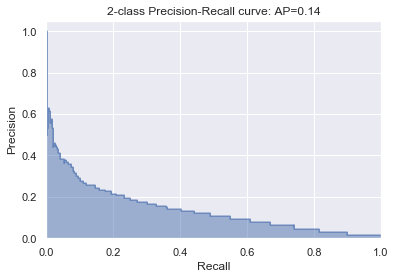

In [227]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

precision, recall, _ = precision_recall_curve(y_test, pred[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(bagDTAP))
plt.show()

A differente Bagging classifier

In [229]:
baggingClf = BaggingClassifier(base_estimator=DT, n_estimators=num_trees, random_state=0, max_samples=0.01)
baggingClf.fit(X_train, y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.01, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

# Balanced Bagging Classifier for DT

In [254]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier

bbcDT = BalancedBaggingClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=100, replacement = True, max_samples=0.1)
bbcDT.fit(X_train, y_train.values.ravel())

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=0.1, n_estimators=100, n_jobs=1, oob_score=False,
             random_state=None, ratio=None, replacement=True,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [255]:
y_pred_DT = bbcDT.predict(X_test)
pred_DT = bbcDT.predict_proba(X_test)
AP_DT = metrics.average_precision_score(y_test, pred_DT[:, 1])
print(AP_DT)

0.11079853162460346


In [256]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_DT).ravel()
print((tn, fp, fn, tp))
print(f1_score(y_test, y_pred_DT))

(102705, 28535, 438, 1419)
0.08921442268397724


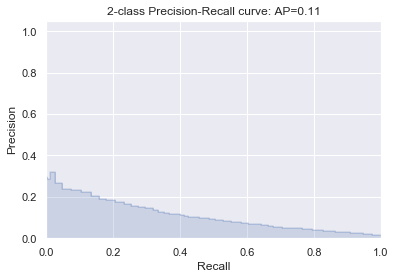

In [257]:
precision, recall, _ = precision_recall_curve(y_test, pred_DT[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(AP_DT))
plt.show()

# Balanced Bagging NB

In [240]:
bbc2 = BalancedBaggingClassifier(base_estimator= MultinomialNB(), n_estimators=100, replacement=True, max_samples=0.1)
bbc2.fit(X_train, y_train.values.ravel())

BalancedBaggingClassifier(base_estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=0.1, n_estimators=100, n_jobs=1, oob_score=False,
             random_state=None, ratio=None, replacement=True,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [251]:
pred_NB2 = bbc2.predict_proba(X_test)
AP_NB2 = metrics.average_precision_score(y_test, pred_NB2[:, 1])
print(AP_NB2)

0.08785408211128123


In [252]:
bbc2_y_pred = bbc2.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, bbc2_y_pred).ravel()
print(tn, fp, fn, tp)

113103 18137 834 1023


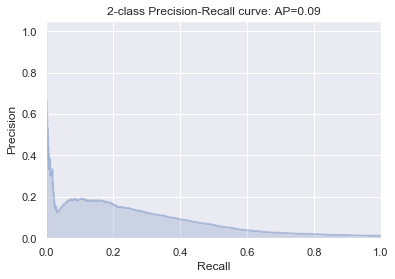

In [253]:
precision, recall, _ = precision_recall_curve(y_test, pred_NB2[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(AP_NB2))
plt.show()

# Balanced bagging Linear SVC

In [243]:
from sklearn.svm import LinearSVC

linSVC = BalancedBaggingClassifier(base_estimator= LinearSVC(), n_estimators=50, replacement=True, max_samples=0.1)
linSVC.fit(X_train, y_train.values.ravel())

BalancedBaggingClassifier(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=0.1, n_estimators=50, n_jobs=1, oob_score=False,
             random_state=None, ratio=None, replacement=True,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [244]:
pred_linSVC = linSVC.predict_proba(X_test)
metrics.average_precision_score(y_test, pred_linSVC[:, 1])

0.05653030342917973

In [248]:
linSVC_y_pred = linSVC.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, linSVC_y_pred).ravel()
print(tn, fp, fn, tp)

114820 16420 692 1165


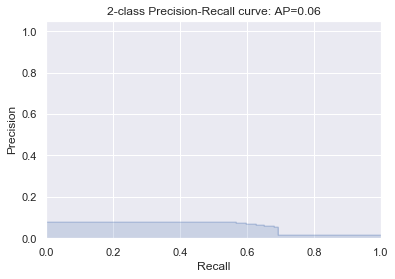

In [249]:
bbc_linSVC_AP = metrics.average_precision_score(y_test, pred_linSVC[:, 1])
precision, recall, _ = precision_recall_curve(y_test, pred_linSVC[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(bbc_linSVC_AP))
plt.show()

# Bagging Linear SVC

In [245]:
bc_SVC = BaggingClassifier(base_estimator=LinearSVC(), n_estimators=num_trees, random_state=0, max_samples=0.1)
bc_SVC.fit(X_train, y_train.values.ravel())

BaggingClassifier(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.1, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [246]:
bc_SVC_pred = bc_SVC.predict_proba(X_test)
bc_SVC_AP = metrics.average_precision_score(y_test, bc_SVC_pred[:, 1])
print(bc_SVC_AP)

0.01401202988112261


In [247]:
bc_SVC_y_pred = bc_SVC.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, bc_SVC_y_pred).ravel()
print(tn, fp, fn, tp)

131233 7 1856 1


# Balanced Bagged Logistic Regression

In [261]:
bbcLR = BalancedBaggingClassifier(base_estimator= LogisticRegression(class_weight="balanced", solver="lbfgs"), n_estimators=100, replacement=True, max_samples=0.1)
bbcLR.fit(X_train, y_train.values.ravel())

BalancedBaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=0.1, n_estimators=100, n_jobs=1, oob_score=False,
             random_state=None, ratio=None, replacement=True,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [262]:
bbcLR_pred = bbcLR.predict_proba(X_test)
bbcLR_AP = metrics.average_precision_score(y_test, bbcLR_pred[:, 1])
print(bbcLR_AP)

0.11398209399807754


In [263]:
bbcLR01 = BalancedBaggingClassifier(base_estimator= LogisticRegression(class_weight="balanced", solver="lbfgs", C=0.1), n_estimators=100, replacement=True, max_samples=0.1)
bbcLR01.fit(X_train, y_train.values.ravel())

BalancedBaggingClassifier(base_estimator=LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=0.1, n_estimators=100, n_jobs=1, oob_score=False,
             random_state=None, ratio=None, replacement=True,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [265]:
bbcLR01_pred = bbcLR01.predict_proba(X_test)
bbcLR01_AP = metrics.average_precision_score(y_test, bbcLR01_pred[:, 1])
print(bbcLR01_AP)

0.09398518504011552


In [266]:
bbcLR10 = BalancedBaggingClassifier(base_estimator= LogisticRegression(class_weight="balanced", solver="lbfgs", C=10.0), n_estimators=100, replacement=True, max_samples=0.1)
bbcLR10.fit(X_train, y_train.values.ravel())

BalancedBaggingClassifier(base_estimator=LogisticRegression(C=10.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=0.1, n_estimators=100, n_jobs=1, oob_score=False,
             random_state=None, ratio=None, replacement=True,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [267]:
bbcLR10_pred = bbcLR10.predict_proba(X_test)
bbcLR10_AP = metrics.average_precision_score(y_test, bbcLR10_pred[:, 1])
print(bbcLR10_AP)

0.11469934026612577


In [272]:
bbcLR10_y_pred = bbcLR10.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, bbcLR10_y_pred).ravel()
print(tn, fp, fn, tp)

112285 18955 639 1218


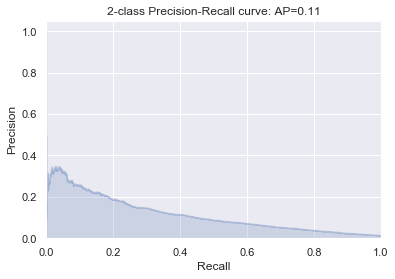

In [273]:
precision, recall, _ = precision_recall_curve(y_test, bbcLR10_pred[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(bbcLR10_AP))
plt.show()

In [268]:
bbcLR100 = BalancedBaggingClassifier(base_estimator= LogisticRegression(class_weight="balanced", solver="lbfgs", C=100.0), n_estimators=100, replacement=True, max_samples=0.1)
bbcLR100.fit(X_train, y_train.values.ravel())

BalancedBaggingClassifier(base_estimator=LogisticRegression(C=100.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=0.1, n_estimators=100, n_jobs=1, oob_score=False,
             random_state=None, ratio=None, replacement=True,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [269]:
bbcLR100_pred = bbcLR100.predict_proba(X_test)
bbcLR100_AP = metrics.average_precision_score(y_test, bbcLR100_pred[:, 1])
print(bbcLR100_AP)

0.11442680160736214


In [270]:
bbcLR50 = BalancedBaggingClassifier(base_estimator= LogisticRegression(class_weight="balanced", solver="lbfgs", C=50.0), n_estimators=100, replacement=True, max_samples=0.1)
bbcLR50.fit(X_train, y_train.values.ravel())

BalancedBaggingClassifier(base_estimator=LogisticRegression(C=50.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=0.1, n_estimators=100, n_jobs=1, oob_score=False,
             random_state=None, ratio=None, replacement=True,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [271]:
bbcLR50_pred = bbcLR50.predict_proba(X_test)
bbcLR50_AP = metrics.average_precision_score(y_test, bbcLR50_pred[:, 1])
print(bbcLR50_AP)

0.11447322275455155


# Balanced Bagging SGD Classifier

In [279]:
bbcSVM = BalancedBaggingClassifier(base_estimator= SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, random_state=42,
                                            max_iter=1000, tol=1e-3), n_estimators=100, random_state=0, max_samples=0.1)
bbcSVM.fit(X_train, y_train.values.ravel())

BalancedBaggingClassifier(base_estimator=SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=0.1, n_estimators=100, n_jobs=1, oob_score=False,
             random_state=0, ratio=None, replacement=False,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [280]:
bbcSVM_pred = bbcSVM.predict_proba(X_test)
bbcSVM_AP = metrics.average_precision_score(y_test, bbcSVM_pred[:, 1])
print(bbcSVM_AP)

0.07710737375980647


In [281]:
bbcSVM_y_pred = bbcSVM.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, bbcSVM_y_pred).ravel()
print(tn, fp, fn, tp)

123395 7845 1006 851


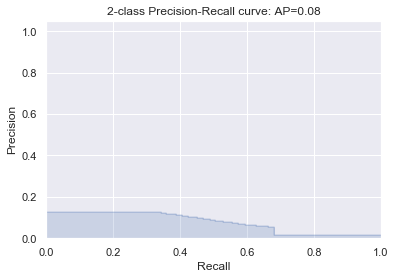

In [282]:
precision, recall, _ = precision_recall_curve(y_test, bbcSVM_pred[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(bbcSVM_AP))
plt.show()

In [ ]:
from mlxtend.classifier import StackingClassifier

lr = BalancedBaggingClassifier(base_estimator= LogisticRegression(), replacement = True)

sclf = StackingClassifier(classifiers=[bbcLR10, clf2, clf3, clf4, clf5],
                          use_probas=True,
                          meta_classifier=lr)

sclf.fit(train_data, y_train)